In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

grayscale = True

In [2]:
df_58_norm_shifted = pd.read_csv('Chips1/'+str(0)+'.csv', index_col=0)

In [9]:
df_58_norm_shifted

,75.6,75.7,75.8,75.9,76.0,76.1,76.2,76.3,76.4,76.5,...,90.6,90.7,90.8,90.9,91.0,91.1,91.2,91.3,91.4,91.5
0,-0.293133,-0.287651,-0.433417,-0.391009,-0.409311,-0.507913,-0.626671,-0.629170,-0.582489,-0.567493,...,1.452357,0.295416,-0.782838,-1.278266,-1.631097,-1.800696,-1.919986,-1.939658,-1.912004,-1.855552
1,-0.440911,-0.396326,-0.223930,-0.207876,-0.159755,-0.158674,-0.193652,-0.162875,-0.228464,-0.208542,...,-0.686258,-0.847294,-0.974651,-1.098398,-1.199842,-1.296832,-1.361353,-1.412489,-1.409124,-1.321375
2,0.066270,-0.077787,-0.220278,-0.348624,-0.300507,-0.687342,-0.527758,-0.655705,-0.533441,-0.424937,...,-1.189316,-1.407475,-1.475987,-1.652229,-1.906392,-2.125273,-2.339762,-2.517330,-2.507286,-2.239505
3,-0.480946,-0.486815,-0.498284,-0.510399,-0.509915,-0.456554,-0.411486,-0.396571,-0.347357,-0.272566,...,-0.352095,-0.716496,-0.964021,-1.104253,-1.170378,-1.160393,-1.190875,-1.211185,-1.217926,-1.238619
4,-0.354280,-0.359498,-0.414067,-0.376176,-0.417873,-0.389006,-0.343417,-0.300651,-0.262675,-0.157685,...,-1.039413,-1.067072,-1.098375,-1.141637,-1.171501,-1.210144,-1.242039,-1.271736,-1.268173,-1.217004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,-0.549055,-0.566889,-0.547646,-0.304148,-0.212755,0.029388,0.186751,0.414421,0.450902,0.210115,...,-1.171184,-1.238107,-1.179505,-1.133597,-1.116701,-1.067150,-1.041147,-0.992876,-0.947212,-0.928727
2048,-0.258672,-0.337795,-0.295731,-0.288462,-0.203382,-0.116117,-0.079297,-0.061860,-0.087717,-0.137367,...,-1.034874,-1.051508,-1.082013,-1.126341,-1.167884,-1.204347,-1.244623,-1.281702,-1.265043,-1.181079
2049,-0.329798,-0.347386,-0.306894,-0.355531,-0.301006,-0.272672,-0.177808,-0.136206,-0.049830,-0.012550,...,-0.892501,-0.904128,-0.936412,-0.951292,-0.954786,-0.957801,-0.987745,-0.998072,-1.007944,-1.039937
2050,-0.321782,-0.277071,-0.306282,-0.259875,-0.282253,-0.198609,-0.218603,-0.218053,-0.288306,-0.340859,...,-1.057522,-1.108514,-1.148887,-1.152551,-1.117539,-1.090259,-1.075977,-1.066312,-1.084796,-1.139408


In [3]:
dfs = [pd.read_csv('Chips1/'+str(i)+'.csv', index_col=0) for i in range(10)]
titles = ['C. koseri','E. coli','E. faecium','GBS','H. influenzae','L. monocytogenes','MSSA','S. gallolyticus','S. sanguinis','S. pneumoniae']

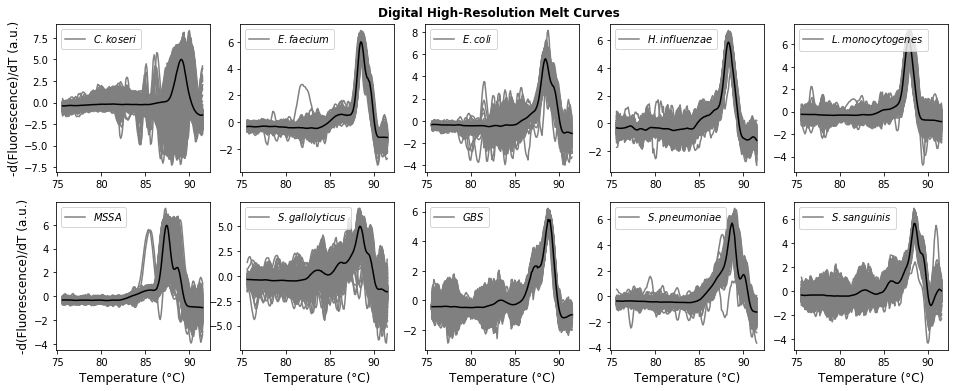

In [14]:
from itertools import cycle
colors = ['C'+'%i' %i for i in [0,1,2,4,5,6,7,8,9]]
colors_cycle = cycle(colors)

order = [0,2,1,4,5,6,7,3,9,8]

fig, axs = plt.subplots(2,5, figsize=(16,6))
axs = axs.flatten()
for i in range(10): #,df in enumerate(dfs):
    df = dfs[order[i]]
    color = next(colors_cycle)
    index = df.columns.map(float).values
    for j,k in enumerate(df.values):
        if(grayscale):
            axs[i].plot(index, k, color='gray', label=r'$%s$' %titles[order[i]] if j == 0 else "" )
        else:
            axs[i].plot(index, k, color=color, label=r'$%s$' %titles[order[i]] if j == 0 else "" )
    axs[i].plot(index, df.mean(axis=0), color='black') #, label='Mean')
    axs[i].legend(loc='upper left')
    if(i > 4):
        axs[i].set_xlabel('Temperature (\u00b0C)', fontsize=12)
    if(i==0 or i==5):
        axs[i].set_ylabel('-d(Fluorescence)/dT (a.u.)', fontsize=12)
    fig.patch.set_facecolor('none')
plt.suptitle('Digital High-Resolution Melt Curves', x=.51, y=.92, fontweight='bold')
plt.show()   

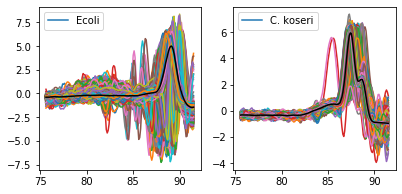

In [30]:
fig, axs = plt.subplots(1,2, figsize=(6.4,3))
axs = axs.flatten()
for i,df in enumerate([dfs[0],dfs[6]]):
    color = next(colors_cycle)
    index = df.columns.map(float)
    for j,k in enumerate(df.values):
        axs[i].plot(index, k, label=titles[i] if j == 0 else "")
    axs[i].plot(index, df.mean(axis=0), color='black')
    axs[i].legend(loc='upper left')
plt.show()   

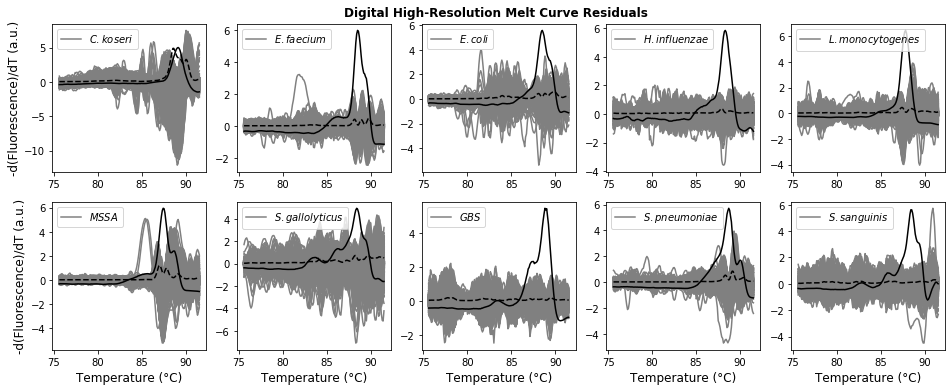

In [22]:
colors = ['C'+'%i' %i for i in [0,1,2,4,5,6,7,8,9]]
colors_cycle = cycle(colors)

order = [0,2,1,4,5,6,7,3,9,8]

fig, axs = plt.subplots(2,5, figsize=(16,6))
axs = axs.flatten()
for i in range(10): #,df in enumerate(dfs):
    df = dfs[order[i]]
    color = next(colors_cycle)
    index = df.columns.map(float).values
    mean = df.mean(axis=0)
    for j,k in enumerate(df.values):
        if(grayscale):
            axs[i].plot(index, k-mean, color='gray', label=r'$%s$' %titles[order[i]] if j == 0 else "")
        else:
            axs[i].plot(index, k-mean, color=color, label=r'$%s$' %titles[order[i]] if j == 0 else "")
    axs[i].plot(index, mean, color='black')#, label='Mean')
    if(grayscale):
        axs[i].plot(index, df.var(axis=0), '--',color='black')
    else:
        axs[i].plot(index, df.var(axis=0), color='red')#, label='Variation')
    axs[i].legend(loc='upper left')
    if(i > 4):
        axs[i].set_xlabel('Temperature (\u00b0C)', fontsize=12)
    if(i==0 or i==5):
        axs[i].set_ylabel('-d(Fluorescence)/dT (a.u.)', fontsize=12)
fig.patch.set_facecolor('none')
plt.suptitle('Digital High-Resolution Melt Curve Residuals', x=.51, y=.92, fontweight='bold')
plt.show()

# Real vs uMelt

In [22]:
dfs10_lowres = pd.read_csv('Import Files/dfs10_norm lowRes.csv', index_col=0)
dfs10_hires = pd.read_csv('Import Files/dfs10_norm hiRes.csv', index_col=0)
dfs10_lowres.columns = dfs10_lowres.columns.map(float)
dfs10_hires.columns = dfs10_hires.columns.map(float)

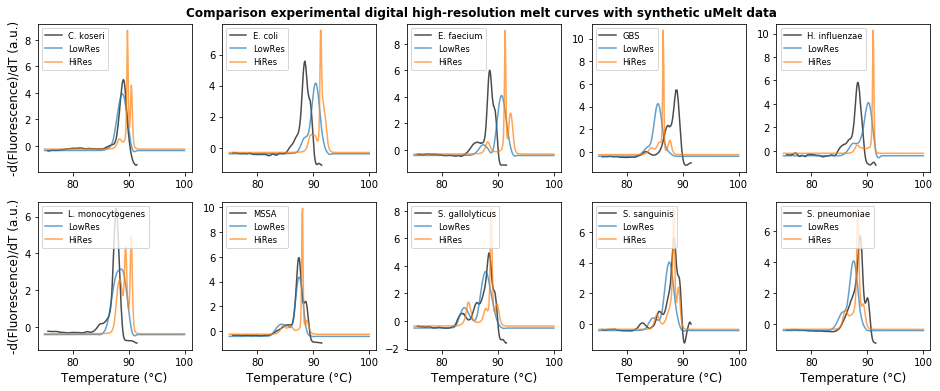

In [28]:
# titles = ['C Koseri','Ecoli','Efaecium','GBS','HInfluenzae','Listeria','MSSA','S Gallo','Ssanguinis','StrepPneumo'] #cut NTCcolors = ['C'+'%i' %i for i in range(10)]
order = [1,0,5,3,2,4,9,6,8,7]
# dfs = [df_EC, df_CK, df_HI, df_GBS, df_L, df_EF, df_SG, df_SP, df_SS, df_MSSA]

colors = ['C'+'%i' %i for i in [0,1,2,4,5,6,7,8,9]]
colors_cycle = cycle(colors)
_, axs = plt.subplots(2,5, figsize=(16,6))
axs = axs.flatten()
index = dfs10_lowres.columns.values
for i,df in enumerate(dfs):
    axs[i].plot(dfs[0].columns.values[-171:].astype(float), df.mean(axis=0).values[-171:], color='black', alpha=.7, label=titles[i])
    axs[i].plot(index, dfs10_lowres.iloc[order[i]].values, color='C0', alpha=.7, label='LowRes')
    axs[i].plot(index, dfs10_hires.iloc[order[i]].values, color='C1',alpha=.7, label='HiRes')

    axs[i].legend(loc='upper left',fontsize='small')
    if(i > 4):
        axs[i].set_xlabel('Temperature (\u00b0C)', fontsize=12)
    if(i==0 or i==5):
        axs[i].set_ylabel('-d(Fluorescence)/dT (a.u.)', fontsize=12)
plt.suptitle('Comparison experimental digital high-resolution melt curves with synthetic uMelt data', x=.51, y=.92, fontweight='bold')
plt.show()

# Synthetic Pairs

In [26]:
euclid_duos=[['Yersinia pestis', 'Yersinia pseudotuberculosis'],
['Bacillus anthracis', 'Bacillus cereus'],
['Proteus vulgaris', 'Pseudomonas aeruginosa'],
['Streptococcus sanguinis', 'Yersinia enterocolitica'],
['Proteus mirabilis', 'Proteus vulgaris'],
['Bordetella parapertussis', 'Bordetella pertussis'],
['Staphylococcus epidermidis', 'Staphylococcus lugdunensis'],
['Staphylococcus lugdunensis', 'Staphylococcus saprophyticus'],
['Mycobacterium gordonae', 'Mycobacterium kansasii'],
['Yersinia enterocolitica', 'Yersinia pestis'],
['Micrococcus luteus', 'Mycobacterium fortuitum'],
['Staphylococcus aureus', 'Staphylococcus epidermidis'],
['Yersinia enterocolitica', 'Yersinia pseudotuberculosis'],
['Proteus mirabilis', 'Pseudomonas aeruginosa'],
['Acinetobacter calcoaceticus', 'Aerococcus viridans']]

In [24]:
df_58_norm_shifted = pd.read_csv('df_58_norm_shifted.csv', index_col=0)

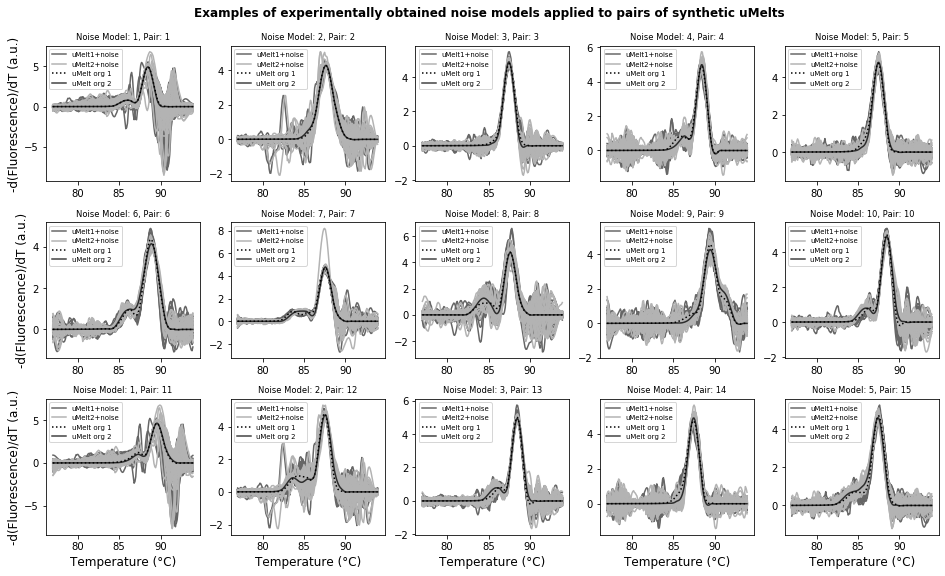

In [40]:
noise_cycle = cycle(range(10))
index = df_58_norm_shifted.columns.map(float).values
fig, axs = plt.subplots(3,5, figsize=(16,9))
axs = axs.flatten()
for i in range(15):
    noise = next(noise_cycle)
    x_train = pd.read_csv('noise'+str(noise)+'/duo'+str(i)+'/split'+str(0)+'/x_train'+str(0)+'.csv').iloc[:,1:].values
    for j in range(100): #int(len(x_train)/2)):
        axs[i].plot(index, x_train[j], color='C0' if grayscale==0 else '.4', label='uMelt1+noise' if j == 0 else "")
    for j in range(100): #int(len(x_train)/2)):
        axs[i].plot(index, x_train[int(len(x_train)/2)+j], color='C1' if grayscale==0 else '.7', label='uMelt2+noise' if j == 0 else "")
    if grayscale:
        axs[i].plot(index,df_58_norm_shifted.loc[euclid_duos[i][0]].values, ':k', label='uMelt org 1')
        axs[i].plot(index,df_58_norm_shifted.loc[euclid_duos[i][1]].values, 'k', alpha=.75, label='uMelt org 2')
    else:
        axs[i].plot(index,df_58_norm_shifted.loc[euclid_duos[i][0]].values, color='k', label='uMelt org 1')
        axs[i].plot(index,df_58_norm_shifted.loc[euclid_duos[i][1]].values, alpha=.75, color='k', label='uMelt org 2')
    axs[i].set_title('Noise Model: %i, Pair: %i' %(noise+1,i+1), fontsize='small')
    axs[i].legend(fontsize='x-small', loc='upper left')
    if(i > 9):
        axs[i].set_xlabel('Temperature (\u00b0C)', fontsize=12)
    if(i==0 or i==5 or i==10):
        axs[i].set_ylabel('-d(Fluorescence)/dT (a.u.)', fontsize=12)
fig.subplots_adjust(hspace=0.3)
fig.patch.set_facecolor('none')
plt.suptitle('Examples of experimentally obtained noise models applied to pairs of synthetic uMelts', x=.51, y=.94, fontweight='bold')
plt.show()

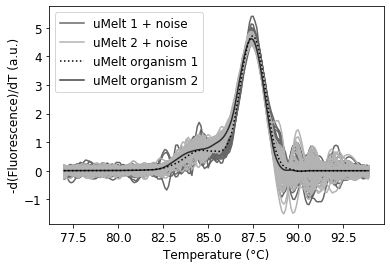

In [45]:
noise_cycle = cycle(range(10))
index = df_58_norm_shifted.columns.map(float).values
fig = plt.figure()
for i in [14]:
    noise = 2
    x_train = pd.read_csv('noise'+str(noise)+'/duo'+str(i)+'/split'+str(0)+'/x_train'+str(0)+'.csv').iloc[:,1:].values
    for j in range(100): #int(len(x_train)/2)):
        plt.plot(index, x_train[j], color='C0' if grayscale==0 else '.4', label='uMelt 1 + noise' if j == 0 else "")
    for j in range(100): #int(len(x_train)/2)):
        plt.plot(index, x_train[int(len(x_train)/2)+j], color='C1' if grayscale==0 else '.7', label='uMelt 2 + noise' if j == 0 else "")
   
    plt.plot(index,df_58_norm_shifted.loc[euclid_duos[i][0]].values, 'k' if grayscale==0 else ':k', label='uMelt organism 1')
    plt.plot(index,df_58_norm_shifted.loc[euclid_duos[i][1]].values, alpha=.75, color='k', label='uMelt organism 2')
#     plt.title('Noise Model: %i, Pair: %i' %(noise+1,i+1), fontsize='small')
    plt.xticks(fontsize='large')
    plt.yticks(fontsize='large')
    plt.legend(fontsize='large', loc='upper left')
    plt.xlabel('Temperature (\u00b0C)', fontsize=12)
    plt.ylabel('-d(Fluorescence)/dT (a.u.)', fontsize=12)
# plt.savefig('Flowchart_melts', format='svg', bbox_inches='tight')
fig.patch.set_facecolor('none')
plt.show()